In [104]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override() 


import matplotlib.pyplot as plt
#import statsmodels.tsa.seasonal as smt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import datetime as dt
from sklearn import linear_model 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
import os
data_path = "/notebooks/stock_data_analysis/data_2/Stocks"
os.chdir(data_path)

filenames = [x for x in os.listdir(data_path) if x.endswith('.txt') and os.path.getsize(x) > 0]



In [115]:
stock_name = []
for item in filenames:
    name = item.split(".")[0]
    stock_name.append(name)


In [116]:
import random

In [117]:
stock_buy = random.sample(stock_name, 400)


In [118]:
len(stock_buy)

400

In [119]:
def get_data(symbol, data_source = 'goole', start_date = '1900-11-15', end_date = '2017-12-17', last_item = 10):
    df = pdr.get_data_yahoo(symbol, start_date, end_date)
    return df

    

In [120]:
name_stock = []
data_get = {}
for item in stock_buy:
    stock_name = item.upper()
    print stock_name
    stock_data = get_data(stock_name)
    if not stock_data.empty:
        data_get[stock_name] = stock_data
        name_stock.append(stock_name)


        
    

CULP
[*********************100%***********************]  1 of 1 downloadedBXMX
[*********************100%***********************]  1 of 1 downloadedGAB_G
[*********************100%***********************]  1 of 1 downloadedZTO
[*********************100%***********************]  1 of 1 downloadedBTU_
[*********************100%***********************]  1 of 1 downloadedNTNX
[*********************100%***********************]  1 of 1 downloadedTRMT
[*********************100%***********************]  1 of 1 downloadedPLYM_A
[*********************100%***********************]  1 of 1 downloadedCTXS
[*********************100%***********************]  1 of 1 downloadedCVTI
[*********************100%***********************]  1 of 1 downloadedPFPT
[*********************100%***********************]  1 of 1 downloadedVALE
[*********************100%***********************]  1 of 1 downloadedSYT
[*********************100%***********************]  1 of 1 downloadedPBMD
[*********************100%******

[*********************100%***********************]  1 of 1 downloadedBGC
[*********************100%***********************]  1 of 1 downloadedHIIQ
[*********************100%***********************]  1 of 1 downloadedFISK
[*********************100%***********************]  1 of 1 downloadedFFBCW
[*********************100%***********************]  1 of 1 downloadedJPME
[*********************100%***********************]  1 of 1 downloadedSB_D
[*********************100%***********************]  1 of 1 downloadedPTLC
[*********************100%***********************]  1 of 1 downloadedMBUU
[*********************100%***********************]  1 of 1 downloadedAVY
[*********************100%***********************]  1 of 1 downloadedAIG-WS
[*********************100%***********************]  1 of 1 downloadedPME
[*********************100%***********************]  1 of 1 downloadedNLY_C
[*********************100%***********************]  1 of 1 downloadedNUSC
[*********************100%***********

[*********************100%***********************]  1 of 1 downloadedLBIX
[*********************100%***********************]  1 of 1 downloadedTSRI
[*********************100%***********************]  1 of 1 downloadedLSXMK
[*********************100%***********************]  1 of 1 downloadedHLI
[*********************100%***********************]  1 of 1 downloadedFOE
[*********************100%***********************]  1 of 1 downloadedTTPH
[*********************100%***********************]  1 of 1 downloadedPRIM
[*********************100%***********************]  1 of 1 downloadedAPTS
[*********************100%***********************]  1 of 1 downloadedALSN
[*********************100%***********************]  1 of 1 downloadedAHPAU
[*********************100%***********************]  1 of 1 downloadedDAKT
[*********************100%***********************]  1 of 1 downloadedIMGN
[*********************100%***********************]  1 of 1 downloadedPRTA
[*********************100%************

[*********************100%***********************]  1 of 1 downloadedNOA
[*********************100%***********************]  1 of 1 downloadedAEE
[*********************100%***********************]  1 of 1 downloadedSAN_C
[*********************100%***********************]  1 of 1 downloadedKEM
[*********************100%***********************]  1 of 1 downloadedSCE_L
[*********************100%***********************]  1 of 1 downloadedEPAM
[*********************100%***********************]  1 of 1 downloadedFFTY
[*********************100%***********************]  1 of 1 downloadedAFSI_C
[*********************100%***********************]  1 of 1 downloadedAXSM
[*********************100%***********************]  1 of 1 downloadedCBPO
[*********************100%***********************]  1 of 1 downloadedTYHT
[*********************100%***********************]  1 of 1 downloadedTENX
[*********************100%***********************]  1 of 1 downloadedCME
[*********************100%************

In [121]:
len(data_get.keys())

372

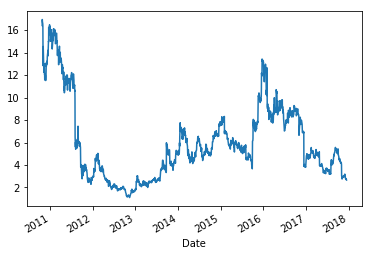

In [123]:
data_get[data_get.keys()[10]].Close.plot()

In [125]:
from sklearn.preprocessing import MinMaxScaler
def data_normalize(df, col):
    data_close = np.reshape(df[col], (df[col].shape[0], 1))
    scaler = MinMaxScaler()
    result_get = scaler.fit_transform(data_close)
    return result_get

def binning_data(data, num_embedding = 1000):
    bins = np.linspace(0, 1, num_embedding)
    inds = np.digitize(data, bins)
    return inds


def get_data(file_name):
    file_name = os.path.join('/notebooks/stock_data_analysis/data_2/Stocks', file_name)
    df = pd.read_csv(file_name, sep=',')
    #combine attributes
    #combine high and low by avg
    #combine open and close by avg
    #combine avgHighLow and avgOpenClose
    df['Price'] = (df['High'] + df['Low'] + df['Open'] + df['Close'])/4
    #take log as this flattens the data more, resulting in a better prediction
    df['Price'] = np.log(df['Price'])

    #drop obsolete columns for faster processing
    columns2Drop = [] #['High', 'Low', 'Open', 'Close', 'OpenInt']
    df = df.drop(labels=columns2Drop, axis=1)

    #create new attribute of "movement"
    df['Volume*Price'] = df['Volume'] * df['Price']
    # print(df)

    label = filename
    df['Label'] = label
    df['Date'] = pd.to_datetime(df['Date'])
    #conver data to an number so we can fit it to LinearRegression()
#     df['Date'] = df['Date'].map(dt.datetime.toordinal)

    #data.append(df)
    return df

In [176]:
data_get.keys()

['PRIM',
 'PFPT',
 'SQLV',
 'EOT',
 'AGR',
 'EFSC',
 'KYO',
 'SLMBP',
 'GLPG',
 'TCBIL',
 'PACB',
 'SCACW',
 'AMCA',
 'ECCZ',
 'HMTA',
 'BEL',
 'FTXR',
 'CME',
 'CMC',
 'PCM',
 'CMU',
 'IDCC',
 'EVV',
 'AGGY',
 'UVE',
 'LITB',
 'BABA',
 'GRMN',
 'MHLD',
 'GRR',
 'AXSM',
 'IMAX',
 'DSE',
 'TRCB',
 'HCM',
 'CBA',
 'ITGR',
 'EACQW',
 'NOA',
 'NOC',
 'TENX',
 'HLI',
 'NTNX',
 'SYPR',
 'ACIW',
 'CTY',
 'SMP',
 'PBMD',
 'IDTI',
 'RAVE',
 'CWEB',
 'EPAM',
 'VSEC',
 'MDB',
 'AMLX',
 'SDPI',
 'SUSA',
 'SUSB',
 'FMX',
 'RUBI',
 'IBIO',
 'XNET',
 'CBPO',
 'PUTW',
 'NTZ',
 'EDI',
 'MMP',
 'PUB',
 'CLXT',
 'GPL',
 'PSEC',
 'LTRPA',
 'YRCW',
 'KOS',
 'RKDA',
 'KFY',
 'AGNCN',
 'ABM',
 'NVGS',
 'ABR',
 'BANF',
 'VALE',
 'XON',
 'PRCP',
 'CRAI',
 'AMZA',
 'AAAP',
 'GHS',
 'FNG',
 'MIW',
 'RT',
 'RAD',
 'WTT',
 'IESC',
 'DBVT',
 'MOFG',
 'CHE',
 'FELP',
 'HRL',
 'DAKT',
 'HRB',
 'SCVL',
 'ENLK',
 'VIA',
 'NTES',
 'MCFT',
 'NTEC',
 'SFB',
 'NGD',
 'NGG',
 'STAR',
 'STAY',
 'NYT',
 'FLOW',
 'SGMO',
 'CET

In [173]:
len(data_get)

372

In [194]:
data = {}
for key in data_get.keys():
    df = data_get[key]
    binning_sentence = data_normalize(df, 'Close')
    inds = list(binning_data(binning_sentence).flat)
    data[key] = inds


In [195]:
len(data)

372

In [183]:
def get_label(data, len_seq = 10):
    y = []
    seq_x = []
    for i in range(0, len(data), len_seq):
        if i-10>=0 and i+1<len(data):
            list_data = data[i-10:i]
            next_data = data[i+1]
            if next_data > data[i]:
                label = 1
            else:
                label = 0
            y.append(label)
            seq_x.append(list_data)
    return seq_x, y

In [200]:
y = []
seq_x = []

for key in data.keys():
    item = data[key]
    
    one_x, one_y = get_label(item[:-10])
    y += one_y
    seq_x += one_x

In [202]:
len(seq_x)

125707

# For the prediction

In [204]:
input_data = []
stock_name = []
for key in data.keys():
    item = data[key]
    if len(item[-10:]) ==10:
        input_data.append(item[-10:])
        stock_name.append(key)

In [207]:
len(input_data)

358

In [208]:
len(input_data[:256])

256

In [209]:
import tensorflow as tf

sess=tf.Session()    
#First let's load meta graph and restore weights
saver = tf.train.import_meta_graph('/tmp/testing/stock_prediction_12_19/model.ckpt-1000.meta')


In [210]:
saver.restore(sess,tf.train.latest_checkpoint('/tmp/testing/stock_prediction_12_19/'))

INFO:tensorflow:Restoring parameters from /tmp/testing/stock_prediction_12_19/model.ckpt-1000


In [211]:
graph = tf.get_default_graph()
x = graph.get_tensor_by_name("input_seq:0")
seqlen = graph.get_tensor_by_name("input_len:0")
pred_prob = graph.get_tensor_by_name("pred_prob:0")

In [212]:
seqlen

<tf.Tensor 'input_len:0' shape=(256,) dtype=int32>

In [213]:
input_x = input_data[:256]

In [214]:
input_len = np.array([10]*256)

In [215]:
feed_dict = {x:input_x,
             seqlen:input_len
             }

In [216]:
predict_result = sess.run(pred_prob, feed_dict= feed_dict)

In [219]:
import pandas as pd

In [229]:
df = pd.DataFrame(predict_result, columns = ["prob_0", "prob_1"])

In [232]:
df.shape

(256, 2)

In [230]:
df.head(10)

,prob_0,prob_1
0,0.157691,0.842309
1,0.999676,0.000324
2,0.901348,0.098652
3,0.999988,0.000012
4,0.073786,0.926214
5,0.993037,0.006963
6,0.996420,0.003580
7,0.999961,0.000039
8,0.999957,0.000043
9,0.959390,0.040610


In [288]:
data_get[name]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1982-06-02,4.805555,4.875000,4.736111,4.763889,1.658197,1081800
1982-06-03,4.736111,4.763889,4.694445,4.694445,1.634025,672300
1982-06-04,4.638889,4.680555,4.583333,4.597222,1.600185,828900
1982-06-07,4.638889,4.694445,4.583333,4.666667,1.624357,287100
1982-06-08,4.638889,4.680555,4.597222,4.597222,1.600185,330300
1982-06-09,4.611111,4.638889,4.583333,4.597222,1.600185,841500
1982-06-10,4.597222,4.611111,4.583333,4.597222,1.600185,591300
1982-06-11,4.638889,4.680555,4.583333,4.625000,1.609853,1161000
1982-06-14,4.611111,4.625000,4.583333,4.583333,1.595351,498600


In [263]:
select_stock_price = {}
price = []
for name in stock_name[:256]:
    select_stock_price[name] = data_get[name]["Close"][-1]
    price.append(data_get[name]["Close"][-1])
    

In [262]:
df["stock_name"] = stock_name[:256]
df["price"] = price

256

In [267]:
select_stock_price["PRIM"]

26.989999999999998

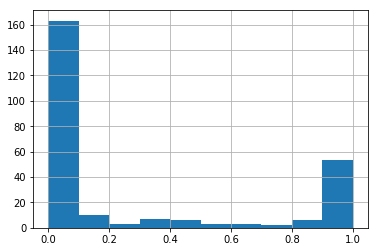

In [268]:
df.prob_1.hist()

In [272]:
df.sort_values(by = 'prob_1', ascending = False).head(30)

,prob_0,prob_1,stock_name,price
66,0.000022,0.999978,IAM,9.930000
255,0.000048,0.999952,NSC,141.110001
244,0.000050,0.999950,BVXV,5.030000
83,0.000055,0.999945,AAAP,81.529999
188,0.000127,0.999873,GPL,1.210000
53,0.000344,0.999655,SUSA,111.400002
90,0.000382,0.999618,ABR,8.710000
45,0.000683,0.999318,IDTI,30.440001
119,0.000904,0.999096,GCP,32.500000
227,0.000981,0.999019,BCX,9.270000


In [283]:
def select_range(df,  min_value, max_value, col = "price"):
    return df[df[col].between(min_value, max_value, inclusive=False)]



In [284]:
df_range = select_range(df, 20, 60)

In [286]:
df_range.sort_values(by = 'prob_1', ascending = False).head(30)

,prob_0,prob_1,stock_name,price
45,0.000683,0.999318,IDTI,30.440001
119,0.000904,0.999096,GCP,32.500000
153,0.001094,0.998906,OME,21.950001
95,0.001299,0.998701,HRL,36.790001
240,0.001572,0.998428,SRG,39.740002
249,0.001704,0.998296,CNXN,26.660000
204,0.001991,0.998009,AEL,31.530001
64,0.002270,0.997730,PUB,32.349998
30,0.002813,0.997187,IMAX,25.000000
239,0.003180,0.996819,WAL,57.400002


In [274]:
df[df['price'].between(20, 50, inclusive=False)]


,prob_0,prob_1,stock_name,price
0,0.157691,0.842309,PRIM,26.990000
2,0.901348,0.098652,SQLV,26.879999
3,0.999988,0.000012,EOT,22.740000
5,0.993037,0.006963,EFSC,44.500000
9,0.959390,0.040610,TCBIL,25.570000
11,0.005692,0.994308,AMCA,27.030001
12,0.087132,0.912868,ECCZ,25.136801
15,0.999906,0.000094,FTXR,25.329800
17,0.122853,0.877147,CMC,20.610001
23,0.856861,0.143139,UVE,26.100000


In [ ]:
import tensorflow as tf

batch_size = 256
embedding_size = 64
generations = 5000
print_loss_every = 500
num_embedding = 1000
num_sampled = int(batch_size/2)    # Number of negative examples to sample.
window_size = 8       # How many words to consider left and right.

In [ ]:
valid_examples = [1,20,30,149,293]


In [ ]:
# Generate data randomly (N words behind, target, N words ahead)
def generate_batch_data(sentences, batch_size, window_size, method='skip_gram'):
    # Fill up data batch
    batch_data = []
    label_data = []
    while len(batch_data) < batch_size:
        # select random sentence to start
        idx = np.random.choice(len(sentences),1)
        rand_sentence = sentences[idx[0]]
        # Generate consecutive windows to look at
        window_sequences = [rand_sentence[max((ix-window_size),0):(ix+window_size+1)] for ix, x in enumerate(rand_sentence)]
        # Denote which element of each window is the center word of interest
        label_indices = [ix if ix<window_size else window_size for ix,x in enumerate(window_sequences)]
        
        # Pull out center word of interest for each window and create a tuple for each window
        if method=='skip_gram':
            batch_and_labels = [(x[y], x[:y] + x[(y+1):]) for x,y in zip(window_sequences, label_indices)]
            # Make it in to a big list of tuples (target word, surrounding word)
            tuple_data = [(x, y_) for x,y in batch_and_labels for y_ in y]
        elif method=='cbow':
            batch_and_labels = [(x[:y] + x[(y+1):], x[y]) for x,y in zip(window_sequences, label_indices)]
            # Make it in to a big list of tuples (target word, surrounding word)
            tuple_data = [(x_, y) for x,y in batch_and_labels for x_ in x]
        else:
            raise ValueError('Method {} not implemented yet.'.format(method))
            
        # extract batch and labels
        batch, labels = [list(x) for x in zip(*tuple_data)]
        batch_data.extend(batch[:batch_size])
        label_data.extend(labels[:batch_size])
    # Trim batch and label at the end
    batch_data = batch_data[:batch_size]
    label_data = label_data[:batch_size]
    
    # Convert to numpy array
    batch_data = np.array(batch_data)
    label_data = np.transpose(np.array([label_data]).astype(int))
    
    return(batch_data, label_data)

In [ ]:
# Define Embeddings:
embeddings = tf.Variable(tf.random_uniform([num_embedding, embedding_size], -1.0, 1.0), name = "product_vec")

# NCE loss parameters
nce_weights = tf.Variable(tf.truncated_normal([num_embedding, embedding_size],
                                               stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([num_embedding]))

# Create data/target placeholders
x_inputs = tf.placeholder(tf.int32, shape=[batch_size])
y_target = tf.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

# Lookup the word embedding:
embed = tf.nn.embedding_lookup(embeddings, x_inputs)

# Get loss from prediction
loss_get = tf.nn.nce_loss(weights=nce_weights,            # Tensor of shape(50000, 128)
                          biases=nce_biases,              # vector of zeros; len(128)
                          labels=y_target,            # labels == context words enums
                          inputs=embed,                   # Tensor of shape(128, 128)
                          num_sampled=num_sampled,        # 64: randomly chosen negative (rare) words
                          num_classes=num_embedding)   # 50000: by construction
loss = tf.reduce_mean(loss_get)



In [ ]:
# Create optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.0).minimize(loss)

tf.summary.scalar("loss", loss)

merged_summary_op = tf.summary.merge_all()

In [ ]:
# Cosine similarity between words
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)


In [ ]:
config = tf.ConfigProto()


try:
    sess = tf.Session(config=config)
except:
    sess = tf.Session(config=config)

In [ ]:
#Add variable initializer.
init = tf.global_variables_initializer()
sess.run(init)

In [ ]:
LOG_DIR = '/tmp/testing/stock2vec_11'
#tensorboard --logdir=/tmp/testing/example_2_2
summary_writer = tf.summary.FileWriter(LOG_DIR, graph=tf.get_default_graph())
print_valid_every = 100
# Run the skip gram model.
valid_words = [1,23,10,300]
loss_vec = []
loss_x_vec = []
for i in range(generations):
    batch_inputs, batch_labels = generate_batch_data(data, batch_size, window_size)
    feed_dict = {x_inputs : batch_inputs, y_target : batch_labels}

    # Run the train step
    _, summary = sess.run([optimizer, merged_summary_op], feed_dict=feed_dict)
    
    summary_writer.add_summary(summary, i)

    # Return the loss
    if (i+1) % print_loss_every == 0:
        loss_val = sess.run(loss, feed_dict=feed_dict)
        loss_vec.append(loss_val)
        loss_x_vec.append(i+1)
        print("Loss at step {} : {}".format(i+1, loss_val))
      
    # Validation: Print some random words and top 5 related words
#     if (i+1) % print_valid_every == 0:
#         sim = sess.run(similarity, feed_dict=feed_dict)
#         for j in range(len(valid_words)):
#             valid_word = name_dict[word_dictionary_rev[valid_examples[0]]] #word_dictionary_rev[valid_examples[j]]
#             top_k = 5 # number of nearest neighbors
#             nearest = (-sim[j, :]).argsort()[1:top_k+1]
#             #name_dict[word_dictionary_rev[valid_examples[0]]]
#             log_str = "Nearest to {}::".format(valid_word)
#             for k in range(top_k):
#                 close_word = name_dict[word_dictionary_rev[valid_examples[k]]] #word_dictionary_rev[nearest[k]]
#                 log_str = "%s %s," % (log_str, close_word)
#             print(log_str)
#             print "#################"
            

In [ ]:
LOG_DIR

In [ ]:
new_df = pd.DataFrame() #creates a new dataframe that's empty
new_df["index"] = range(num_embedding)
import csv
new_df.to_csv(os.path.join(LOG_DIR, 'output2.tsv'), sep='\t', quoting=csv.QUOTE_NONE)



In [ ]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [ ]:
embeddings_matrix = sess.run(embeddings)    


In [ ]:
embeddings_matrix

In [ ]:
pathModel

In [ ]:
np.save(embedding_save_path, embeddings_matrix)


In [ ]:
embedding_save_path = os.path.join(pathModel, "data.npy")

In [ ]:

embedding_save_path = os.path.join(pathModel, "data")
data_get = np.load(embedding_save_path)

In [ ]:
save_picle(embeddings_matrix, embedding_save_path)

In [ ]:
embeddings_matrix.shape

In [ ]:
with open(embedding_save_path, 'w') as f:
    f.write(json.dumps(embeddings_matrix))


In [ ]:
from tensorflow.contrib.tensorboard.plugins import projector
# Create randomly initialized embedding weights which will be trained.

# Format: tensorflow/tensorboard/plugins/projector/projector_config.proto
config = projector.ProjectorConfig()

# You can add multiple embeddings. Here we add only one.
embedding = config.embeddings.add()
embedding.tensor_name = 'product_vec'
# Link this tensor to its metadata file (e.g. labels).
embedding.metadata_path = os.path.join(LOG_DIR, 'output2.tsv')

# Use the same LOG_DIR where you stored your checkpoint.
summary_writer = tf.summary.FileWriter(LOG_DIR)

# The next line writes a projector_config.pbtxt in the LOG_DIR. TensorBoard will
# read this file during startup.
projector.visualize_embeddings(summary_writer, config)

In [ ]:
saver = tf.train.Saver()

saver.save(sess, os.path.join(LOG_DIR, "model.ckpt"), 1000)


